# Supplementary material

Authors:  S. Kokabisaghi and E.J. Pauwels 

Affiliation:  Centrum Wiskunde en Informatica (CWI), Amsterdam, Netherlands.

Link to paper on Arxiv

Date:   March 2020

Version:  1.0

Notes: 

In [ ]:
# Import required packages
import numpy as np
from sympy import *


import matplotlib.pyplot as plt #Required packages for plotting 
from matplotlib import rcParams
plt.rcParams["font.weight"] = "bold"# Bold text in plot
plt.rcParams["axes.labelweight"] = "bold"

import warnings
warnings.filterwarnings("ignore")

# structure: 
[1. Introduce primary parameters](#scrollTo=bA5xytuQyzDw&line=10&uniqifier=1)

[2. Dependence of $h$ and $g$ on sniping probability $p$](#scrollTo=HoGzjmOjxj3E&line=13&uniqifier=1)

[2.1. Visualization: h(p) vs h'(p)](#scrollTo=KexOxwmGgq2j&line=7&uniqifier=1)

[3. Conditions in the presence of deceptive agent](#scrollTo=-IkqkEqCwiZ0&line=1&uniqifier=1)

In [ ]:
# Introduce the primary parameters as Symbol

from sympy.abc import s, alpha, mu, delta, gamma, sigma, p

H = symbols('H', positive=True)

print(H.assumptions0)

# introduce the symbols for secondary parameters (are functions of the primary parameters)

from sympy.abc import beta, g,h,q, theta 
alphabar = symbols('alphabar')
mubar = symbols('mubar')
thetabar = symbols('thetabar')
m = 1-mubar

#  Introduce some numerical values for the primary paramaters and use them 
#  to compute the corresponding values for the secondary (i.e. derived) parameters

alpha_val = .45
mu_val  = .5
delta_val = .5
H_val = 5
gamma_val = 1.5
sigma_val =1
s_val = .45
#
beta_val = alpha_val/(alpha_val + mu_val)
alphabar_val = alpha_val * delta_val /2
mubar_val = mu_val * delta_val/2
q_val = gamma_val -1
beta_val = alpha_val/(alpha_val+mu_val)
theta_val = 2*alpha_val*mu_val/(alpha_val+mu_val)
thetabar_val = theta_val*delta_val/2
m_val = 1- mubar_val

#  Create a dictionary that makes the appropriate substitutions for numerical experiments 


dict_subs_numerical_vals = {alpha: alpha_val, mu : mu_val, delta :delta_val, H : H_val, gamma :gamma_val, 
                            beta: beta_val, mubar:mubar_val, theta :theta_val, thetabar :thetabar_val, alphabar: alphabar_val, m:m_val}

print(dict_subs_numerical_vals)


{'positive': True, 'real': True, 'complex': True, 'nonzero': True, 'negative': False, 'nonpositive': False, 'nonnegative': True, 'zero': False, 'hermitian': True, 'imaginary': False, 'commutative': True}
{alpha: 0.45, mu: 0.5, delta: 0.5, H: 5, gamma: 1.5, beta: 0.4736842105263158, mubar: 0.125, theta: 0.4736842105263158, thetabar: 0.11842105263157895, alphabar: 0.1125, -mubar + 1: 0.875}



#2. Dependence of $h$ and $g$ on sniping probability $p$ (KPD.section. 3.1, 3.2 , Appendix E)

If $p$ denotes the probability that an indvidual agent will snipe, then 
we have two important derived probabilities: 

  1. $h(p) = P(\mbox{MM will lose the race})$
  2. $g(p) = P(\mbox{bandit will win race} \,| \, \mbox{he enters the race})$

In the paper it was shown that 

$$  h(0) = 0 \quad\quad h(1) = \frac{H-1}{H}  \quad\quad h'(0) = \frac{H-1}{2} 
\quad \quad h'(1) = 1/H$$

$$ g(0) = 1/2 \quad\quad g(1) = 1/H \quad \quad g'(0) = - \frac{H-2}{6} \quad \quad 
g'(1) = -\frac{H-2}{H(H-1)}   $$


In [ ]:

print('=== h(p) in compact and expanded form: ')
print('')
H =Symbol("H",real = True, positive = True)
p =Symbol("p",real = True, positive = True)


h = ( p*H - 1 + (1-p)**H)/ (p*H)
# By expanding the binomials, we can recast h(p) to :
h_expanded_low_order = (p*(H-1)/2) - ((H-1)*(H-2)/6)*p**2 
h_expanded = h_expanded_low_order  + Order(p**3)  #eq.68

print('Compact:  h(p) = ', h)
print('Expanded: h(p) = ', h_expanded)
print('')
print('Substituting p=0 in the expanded, and p=1 in the compact form yields: ')
print('')
h_1 = h.subs({p:1})
h_0 = h_expanded.subs({p:0}) 
print('h(0) = ', h_0)
print('h(1) = ', h_1)

print('')
print('--- Derivatives of h ---')
print('')
#----------------------------------------

dh_dp = diff(h,p)
dh_dp_expanded = diff(h_expanded, p)
print('dh/dp_expanded = ', dh_dp)

dh_dp_0 = limit(dh_dp,p,0,'+')  # limit for p--> 0+ (i.e. limit from the right)
dh_dp_1 = limit(dh_dp,p,1,'-')  # limit for p--> 1- (i.e. limit from the left)

print("h'(0) = " ,  dh_dp_0)
print("h'(1) = " ,  dh_dp_1)

print('')
print('==== g(p) in compact and expanded form ')

g =  h / ((H-1)*p)
# g_expanded = (1/((H-1)*p))*h_expanded
g_expanded_0 = h_expanded_low_order/((H-1)*p)
g_expanded_0 = g_expanded_0.cancel().collect(p)
g_expanded = g_expanded_0 + Order(p**2)

print('Compact:  g(p) = ', g)
print('Expanded: g(p) = ', g_expanded)

g_0 = g_expanded.subs({p:0})
g_1 = g.subs({p:1}) #KPD.eq.71
print('g(1) = ', g_1)
print('g(0) = ', g_0)


print('')
print('------------- derivatives of g -----')
print(' ')
dg_dp = diff(g,p) #KPD.eq. 74
print("g'(p) = ", dg_dp)

dg_dp_0 = limit(dg_dp, p , 0 , '+')
print("g'(0) =", dg_dp_0)

dg_dp_1 = (dh_dp_1 *p - h_1)/ (H-1)* p**2
dg_dp_1 = dg_dp_1.subs({p:1}).simplify()

print("g'(1) =", dg_dp_1)

=== h(p) in compact and expanded form: 

Compact:  h(p) =  (H*p + (-p + 1)**H - 1)/(H*p)
Expanded: h(p) =  p*(H - 1)/2 - p**2*(H - 2)*(H - 1)/6 + O(p**3)

Substituting p=0 in the expanded, and p=1 in the compact form yields: 

h(0) =  0
h(1) =  (H - 1)/H

--- Derivatives of h ---

dh/dp_expanded =  (H - H*(-p + 1)**H/(-p + 1))/(H*p) - (H*p + (-p + 1)**H - 1)/(H*p**2)
h'(0) =  H/2 - 1/2
h'(1) =  1/H

==== g(p) in compact and expanded form 
Compact:  g(p) =  (H*p + (-p + 1)**H - 1)/(H*p**2*(H - 1))
Expanded: g(p) =  1/2 + p*(-H/6 + 1/3) + O(p**2)
g(1) =  1/H
g(0) =  1/2

------------- derivatives of g -----
 
g'(p) =  (H - H*(-p + 1)**H/(-p + 1))/(H*p**2*(H - 1)) - 2*(H*p + (-p + 1)**H - 1)/(H*p**3*(H - 1))
g'(0) = -H/6 + 1/3
g'(1) = (-H + 2)/(H*(H - 1))


#2.1. Visulasation: h(p) vs h'(p)

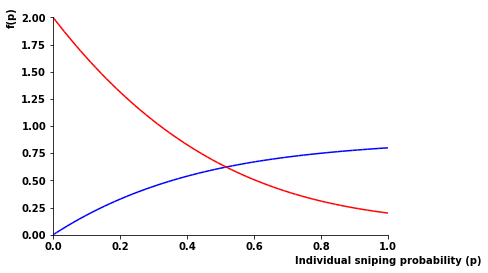


Probability h(p)  the market maker will get sniped as a function of  the sniping 
probability p of the individual bandits. We also show the derivative h'(p) (red curve).


In [ ]:
#-----
# Visulasation
h_test = h.subs(dict_subs_numerical_vals)
dh_dp = dh_dp.subs(dict_subs_numerical_vals)
plot_h = plot(h_test, (p,0,1),line_color ='b',ylim= [0,2], xlabel = 'Individual sniping probability (p)', show = False)

plot_h.extend(plot(dh_dp, (p,0,1),line_color ='r', ylim= [0,2], show = False))
plot_h.show()
print('')
caption = '''Probability h(p)  the market maker will get sniped as a function of  the sniping 
probability p of the individual bandits. We also show the derivative h'(p) (red curve).'''
print(caption)

# 3. Conditions in the presence of deceptive agents (KPD. section.5.3 , Appendix H)
**1. Compute probability for deceptive and trustworthy agent**

- There are Hd deceptive agents, as well as Ht trustworthy ones. 
We focus on a single trustworthy agents who is therefore competing 
with Ht-1 other trustworthy agents, as well as with Hd deceptive ones.

-  To compute the utilities for an individual honest sniper who is competing with Hd 
deceptive agents that snipe for sure and Ht-1 trustworthy snipers

 - 
we have to the functions g and h for the specific situation (presence of deceptive agent).  We will denote them
by g_tb  and h_tm:

  - $h_{tm}(p) =$ prob that trustworth agent as market maker will lose the race
  - $h_{tm}(p) = E[(Hd+Nt)/(1+Hd+Nt)] $    where Nt ~ Bin(Ht-1,p)

  - $g_{tb}(p) = $ prob( trustworthy agent will win race as bandit | he enters race)

Since in this case the trustworthy agent is a bandit, we have to
condition on whether the market maker was selected among the trustworthy
agents (prob = (Ht-1)/H) or from among the devious ones (prob = Hd/H)

Hence: 

$g_{tb}(p) = E[1/(2 + Hd + Nt_1)] \quad ((Ht-1)/H) + E[1/(2 + (Hd-1) + Nt_2)](Hd/H)$

where  Nt_1 ~ B(Ht-2;p)    Nt_2 ~ B(Ht-1; p)

Since it is difficult to write down the above equations in closed
algebraic form, we use simulation to estimate them. 



Probability h(p)  the market maker will get sniped as a function of  the sniping 
probability p of the individual bandits. We also show the derivative h'(p) (red curve).



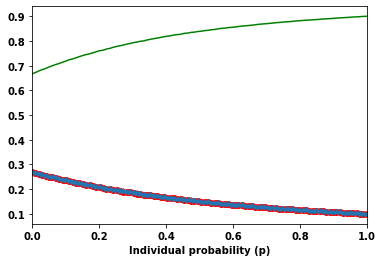

In [ ]:

def compute_htm_gtb(Ht,Hd,p):
      '''
      Compute ht_m (trustworthy agent as Market maker)
      and g_tb (trustworthy agent as bandit)

      '''
      H = Hd+Ht
      nr_simul = 10000
      Nt = np.random.binomial(Ht-1, p, size = (nr_simul,1))
      h_tm = np.mean((Hd+Nt) / (1+Hd+Nt))

      Nt_1 = np.random.binomial(Ht-2, p, size = (nr_simul,1))
      Nt_2 = np.random.binomial(Ht-1, p, size = (nr_simul,1))
      g_tb = np.mean(1/(2+Hd+Nt_1))*((Ht-1)/(H-1)) + np.mean(1/(1+Hd+Nt_2))*(Hd/(H-1))

      # Alternative Computation for g_tb:
      Nt = np.random.binomial(Ht-1,p, size = (nr_simul,1))
      g_tb_2 = (1/(H-1))* np.mean(Hd*(1./(1+Nt+Hd)) + Nt/(1+Nt+Hd) + (Ht-1-Nt)/(2+Nt+Hd) )

      if Ht <= 0:
        print('Number of trustworthy agents Ht needs to be at least one!')

      return g_tb, g_tb_2, h_tm

# Assumption: 8 agents are trustworthy and 2 agents are decisive
Ht = 8
Hd = 2
H = Ht + Hd
#-------
# To store the probabilities
G_tb = [] 
G_tb_2 =[]
H_tm = [] 
#-------
# Define a range of probaility from 0 to 1 to check the probabilities 
PP = np.linspace(0,1,100) 

for pp in PP:

    outcome_probability = compute_htm_gtb(Ht,Hd,pp)

    g_tb = outcome_probability[0]
    g_tb_2 = outcome_probability[1] 
    h_tm = outcome_probability[2] 

    G_tb.append(g_tb)
    G_tb_2.append(g_tb_2)
    H_tm.append(h_tm)

plt.Figure(figsize=(15, 10))
plt.plot(PP, G_tb_2, 'ro',PP, G_tb, '-*',PP, H_tm, 'g')
plt.xlim(0,1);
plt.xlabel('Individual probability (p)',fontsize=10);

Caption = '''green line: htm(p) is the probability that an specific individual trustworthy agent,\\
 who is acting as marketmaker will lose the MZ-race given that the Hd deceptive agents snipe for sure',\\
 blue line: gtb(p) is the conditional probability that a specific trustworthy agent acting as bandit wins the sniping race,\\
 given thathe actually enters the race, and the Hd deceptive agents snipefor sure'''
print('')
print(caption)
print('')
